# Re-code the house price machine learning

### 1.Random Choose Method to get optimal k and b

In [254]:
from sklearn.datasets import load_boston
data = load_boston()
X, Y = data['data'], data['target']

### 2.Supervised Direction to get optimal k and b

### 3.Gradient Descent to get optimal k and b

### 4.Try different Loss funciton and learning rate.

## Finish the search problem

### 1. Get data from web page

In [1]:
import requests
import re
 
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'
}
url = "https://baike.baidu.com/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%81/1579058"

r = requests.get(url, headers = headers)
r.encoding = 'utf-8'

with open('subway_baike.txt', 'w', encoding='utf-8') as fp:
    fp.write(r.text)

### 2. Preprocessing data from page source

#### 上一步爬取了广州地铁，下一步爬取 地铁线路

In [169]:
from bs4 import BeautifulSoup

In [170]:
soup = BeautifulSoup(r.text, 'lxml')
#print(soup.prettify())
#print(soup.title.string)
get_lines = r'<a data-lemmaid.*?href="(.*?)".*?>\n    (广州地铁.*?)\n   </a>'
pattern = re.compile(get_lines)
lines_table = soup.table.prettify()
likes = pattern.findall(lines_table)

In [171]:
likes

[('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF/5185293',
  '广州地铁1号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF/6162023',
  '广州地铁2号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%813%E5%8F%B7%E7%BA%BF/6162147',
  '广州地铁3号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF/6162210',
  '广州地铁4号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF/6786593',
  '广州地铁5号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF/1674272',
  '广州地铁6号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF/5892921',
  '广州地铁7号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF/3122926',
  '广州地铁8号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF/6552289',
  '广州地铁9号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF/9335245',
  '广州地铁13号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%8114%E5%8F%B7%E7%BA%BF/5041514',
  '广州地铁14号线'),
 ('/item/%E5%B9%B

#### 遍历每一条地铁线路，获得地铁站的连接信息

In [172]:
url_header = 'https://baike.baidu.com'
line = url_header + likes[2][0]
line

'https://baike.baidu.com/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%813%E5%8F%B7%E7%BA%BF/6162147'

In [173]:
from collections import defaultdict  
url_header = 'https://baike.baidu.com'

In [174]:
def get_information(line):
    res = requests.get(line, headers=headers)
    res.encoding = 'utf-8'
    
    line_soup = BeautifulSoup(res.text, 'lxml')
    line_str = line_soup.table.prettify()
    
    get_station = r'<a .*?href="(.*?)" target="_blank">\n    (.*?站)\n'
    station_pattern = re.compile(get_station)
    
    station_list = station_pattern.findall(line_str)
    
    return [tup[1].strip() for tup in station_list]

In [175]:
station_connection = defaultdict(list)

In [176]:
for k,item in enumerate(likes):
    # if k == 3: break
    line = url_header + item[0]
    sta_list = get_information(line)
    #print(sta_list)
    for i in range(len(sta_list)-1):
        station_connection[sta_list[i]].append(sta_list[i+1])
        station_connection[sta_list[i+1]].append(sta_list[i])
        
station_connection

defaultdict(list,
            {'一德路站': ['文化公园站', '海珠广场站'],
             '万胜围站': ['官洲站', '车陂南站', '琶洲站'],
             '三元里站': ['飞翔公园站', '广州火车站'],
             '三溪站': ['东圃站', '鱼珠站'],
             '东圃站': ['车陂南站', '三溪站'],
             '东山口站': ['烈士陵园站', '杨箕站', '东湖站', '区庄站'],
             '东晓南站': ['江泰路站', '南洲站'],
             '东涌站': ['庆盛站', '低涌站'],
             '东湖站': ['团一大广场站', '东山口站'],
             '东风站': ['新和站'],
             '中大站': ['晓港站', '鹭江站'],
             '中山八站': ['坦尾站', '西场站'],
             '中新站': ['镇龙站', '坑贝站'],
             '五山站': ['华师站', '天河客运站'],
             '五羊邨站': ['杨箕站', '珠江新城站'],
             '京溪南方医院站': ['梅花园站', '同和站'],
             '人和站': ['龙归站', '高增站'],
             '会江站': ['南浦站', '石壁站'],
             '低涌站': ['东涌站', '海傍站'],
             '体育中心南站': ['天河南站', '林和西站'],
             '体育中心站': ['体育西路站', '广州东站'],
             '体育西路站': ['杨箕站', '体育中心站', '珠江新城站', '石牌桥站'],
             '公园前站': ['西门口站', '农讲所站', '纪念堂站', '海珠广场站'],
             '农讲所站': ['公园前站', '烈士陵园站'],
             '凤凰

In [16]:
import networkx as nx
% matplotlib inline

In [17]:
station_graph = nx.Graph()

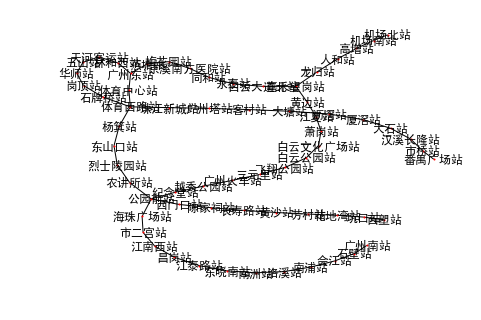

In [121]:
station_with_road = nx.Graph(station_connection)
nx.draw(station_with_road, with_labels=True, node_size=1)

#### 目前利用Networkx可视化效果比较差，会混在一起，上图只可视化其中一部分线路图

### 3. Build the search agent

In [241]:
def search(start, position, connection, sorted_candidate=False, by_way=False):
    pathes = [[start]]
    seen_ = set()
    
    while pathes:
        # print(pathes)
        path = pathes.pop()

        cur_station = path[-1]
        
        if cur_station in seen_: continue

        for i,next_sta in enumerate(connection[cur_station]):
            # print('{},{}'.format(i,next_sta))
            if next_sta in path: continue
            new_path = path + [next_sta]
            if next_sta == position: return new_path
            else:
                pathes = [new_path] + pathes
        
        seen_.add(cur_station)
        
        if sorted_candidate: pathes = sorted_candidate(pathes)

In [242]:
def pretty_print(cities):
    print('🐌->'.join(cities))

In [243]:
result = search('万胜围站', '广州南站', station_connection)
pretty_print(result)

万胜围站🐌->官洲站🐌->大学城北站🐌->大学城南站🐌->板桥站🐌->员岗站🐌->南村万博站🐌->汉溪长隆站🐌->钟村站🐌->谢村站🐌->石壁站🐌->广州南站


### 4. (optional) different policies for transfer system

#### 优先站点少

In [244]:
def transfer_station_first(pathes):
    return sorted(pathes, key = len, reverse=True)

In [245]:
result = search('万胜围站', '广州南站', station_connection, transfer_station_first)
pretty_print(result)

万胜围站🐌->官洲站🐌->大学城北站🐌->大学城南站🐌->板桥站🐌->员岗站🐌->南村万博站🐌->汉溪长隆站🐌->钟村站🐌->谢村站🐌->石壁站🐌->广州南站


#### 优先站点多

In [246]:
def transfer_station_as_much(pathes):
    return sorted(pathes, key = len)

In [247]:
result = search('万胜围站', '广州南站', station_connection, transfer_station_as_much)
pretty_print(result)

万胜围站🐌->官洲站🐌->大学城北站🐌->大学城南站🐌->板桥站🐌->员岗站🐌->南村万博站🐌->汉溪长隆站🐌->大石站🐌->厦滘站🐌->沥滘站🐌->大塘站🐌->客村站🐌->广州塔站🐌->珠江新城站🐌->体育西路站🐌->杨箕站🐌->东山口站🐌->烈士陵园站🐌->农讲所站🐌->公园前站🐌->西门口站🐌->陈家祠站🐌->长寿路站🐌->黄沙站🐌->文化公园站🐌->一德路站🐌->海珠广场站🐌->市二宫站🐌->江南西站🐌->昌岗站🐌->江泰路站🐌->东晓南站🐌->南洲站🐌->洛溪站🐌->南浦站🐌->会江站🐌->石壁站🐌->广州南站


#### 要求经过某个站点